# Name - Ketan Sharma
# Roll No - GH1044613
# Subject - (M505D Intro to AI and Machine Learning (SS0625))

# Project Report Summary: Laptop Price Classification Using Machine Learning
## Introduction

In this project, I focuses on building machine learning models to predict whether a laptop is expensive or not based on its specifications. This dataset contains various features such as brand, type, screen size, resolution, CPU, RAM, memory, GPU, operating system, weight, and price.


# 2.Data Description
.This dataset contains total of 1303 records with 12 columns.

.In Our Datasets,Columns include both numerical and categorical variables, and a target variable 'HighPrice' which is binary (1 for expensive laptops, 0 for non-expensive).

.Dealing With Missing Values

## 3.Data Preprocessing 
## 4.Data Cleaning
## 5.Dealing with missing values
## 6.Apply 2 Machine learning models on our dataset 

# Model Building
### Two models were implemented on our dataset:

Logistic Regression using Keras: A simple neural network with a sigmoid activation for binary classification.

K-Nearest Neighbors (KNN): Custom implemented from scratch to classify laptops based on closest neighbours.

# Business Question : To predict whether a laptop is expensive or not based on its specifications.

# DataSet : Taken From kaggle
https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset/data

In [ ]:
CSV_File Link - 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load Dataset

In [10]:
df=pd.read_csv('C:\\Users\\HP\\Downloads\\laptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## DataTypes OF Columns?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


## Dimensions of Data

In [14]:
df.shape

(1303, 12)

## How Our Data Looks Like Manually

In [16]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


## Unique Values in Each Column

In [18]:
df.nunique()

Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64

# Data Cleaning 

## Checking missing Values

In [21]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## In every Column of my data there are 30 null values ,So best optimal Solution is to delete them directly beacuse ther is not such a big impact on our data 

In [23]:
df.dropna(inplace=True)

## Again Check NUll Values

In [25]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Now There are no null values in our data

# Now Let's Check ALL Columns 

## First of All Delete Unnamed Column from our data beacuse there is no use of it for us

In [29]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [31]:
# Checking for Duplicate Values

In [32]:
df.duplicated().sum()

29

## There are 29 duplicate values in our data, So We have to remove it

In [34]:
df = df.drop_duplicates(keep='last')


## Again Recheck for duplicates values - Now there is no duplicated values in our data.


In [36]:
df.duplicated().sum()

0

## Analyze Column - Company

In [38]:
df['Company'].nunique()

19

In [39]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

## There are total 19 Brand of Laptops Companies in our Dataset

## Column - 'TYPENAME'

In [42]:
df['TypeName'].nunique()

6

In [43]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

## There are total 6 types of laptops model in our dataset.

## Column RAM,Inches and weight should be in Integer form So we can analyze our data easlily.

In [46]:
# Convert 'Ram' to string before using .str
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_48620\1728592075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), int32(1), object(9)
memory usage: 111.8+ KB


In [48]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Saving Ram Column data into Ram(GB) Column and then delete RAM Column Data

In [50]:
df['Ram(GB)'] = df['Ram']

C:\Users\HP\AppData\Local\Temp\ipykernel_48620\935747000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram(GB)'] = df['Ram']


In [51]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ram(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,4
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,16
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,2
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,6


In [52]:
del df['Ram']

In [53]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,Ram(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,4
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,16
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,2
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,6


## Change Weight Column

## This will Not Work Beacuse There is a one Row in which Data is  '?' , So thatswhy it is not working.So I have to delete this row from our  data

In [56]:
# df['Weight[KG]'] = df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)


In [57]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [72]:
df[df['Weight']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,Ram(GB)
200,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72,8


In [74]:
df = df.drop(index=200)

In [76]:
df = df.reset_index(drop=True)

## Now Change Weight Column TO Integer

In [79]:
df['Weight[KG]'] = df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)

In [81]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,Ram(GB),Weight[KG]
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,4,1.80
1238,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,16,1.30
1239,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,2,1.50
1240,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,6,2.19


In [83]:
del df['Weight']

In [85]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight[KG]
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1237,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,4,1.80
1238,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,16,1.30
1239,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,2,1.50
1240,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,6,2.19


In [87]:
# df['Inches'] = df['Inches'].astype('float')

# In this there are also data with value '?',So thatswhy unable to change into float type so we remove rows with value ? in data

In [90]:
df[df['Inches']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight[KG]
463,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,256GB SSD,Nvidia Quadro M1200,Windows 10,128298.24,8,1.78


In [92]:
df = df.drop(index=463)

In [94]:
df = df.reset_index(drop=True)

In [96]:
# now change datatype
df['Inches'] = df['Inches'].astype('float')

In [98]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Price,Ram(GB),Weight[KG]
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1236,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,4,1.80
1237,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,16,1.30
1238,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,2,1.50
1239,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,6,2.19


# Now We change all the data types and looking for outliers

In [101]:
df_cleaned=df.copy()

In [103]:
df_cleaned.describe()

,Inches,Price,Ram(GB),Weight[KG]
count,1241.000000,1241.000000,1241.000000,1241.000000
mean,15.139968,60507.929595,8.522965,2.080016
std,1.968231,37402.124224,5.589564,0.814520
min,10.100000,9270.720000,1.000000,0.000200
25%,14.000000,32639.860800,4.000000,1.500000
50%,15.600000,52693.920000,8.000000,2.040000
75%,15.600000,79653.600000,8.000000,2.330000
max,35.600000,324954.720000,64.000000,11.100000


C:\Users\HP\AppData\Local\Temp\ipykernel_48620\1503746078.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Price'])
C:\Users\HP\AppData\Local\Temp\ipykernel_48620\1503746078.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ram(GB)'])
C:\Users\HP\AppData\Local\Temp\i

<Axes: xlabel='Weight[KG]', ylabel='Density'>

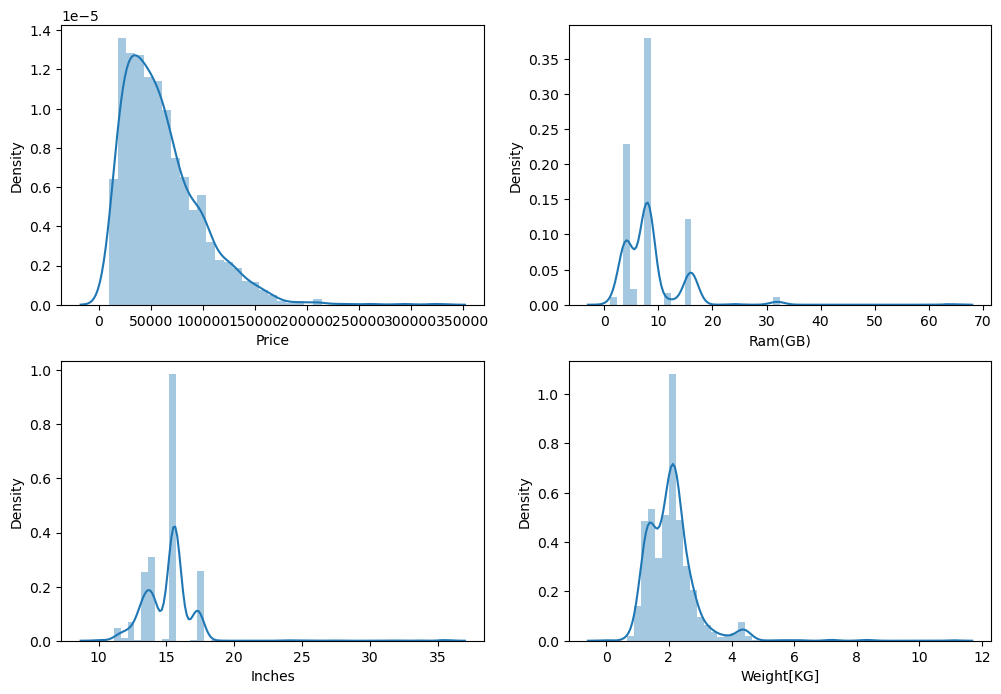

In [105]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.distplot(df_cleaned['Price'])
plt.subplot(2,2,2)
sns.distplot(df_cleaned['Ram(GB)'])
plt.subplot(2,2,3)
sns.distplot(df_cleaned['Inches'])
plt.subplot(2,2,4)
sns.distplot(df_cleaned['Weight[KG]'])


## Acc to these charts there are outliers in each column,But In my DataSet It is clearly seen that some laptops are Expensive and they have high RAM,more weight and bigger Size They are Correlating with each other. SO I am  considering both cases
## Case1 : Apply ML Models on data with Outliers
## Case 2: Apply ML Models on Data After Removing Outliers

# The more optimal and accurate case data we will select.

# CASE : 1

# Correlation of Case 1

In [110]:
corr_df = df_cleaned[['Inches', 'Price', 'Ram(GB)', 'Weight[KG]']]

# Compute correlation matrix
correlation_matrix = corr_df.corr()
print(correlation_matrix)

              Inches     Price   Ram(GB)  Weight[KG]
Inches      1.000000  0.042665  0.142536    0.491199
Price       0.042665  1.000000  0.682738    0.176680
Ram(GB)     0.142536  0.682738  1.000000    0.285735
Weight[KG]  0.491199  0.176680  0.285735    1.000000


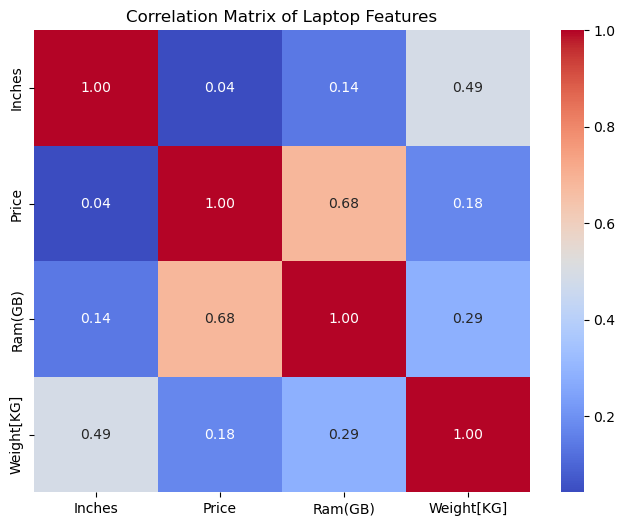

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Laptop Features')
plt.show()

# Like if Price is Increasing than it means Ram,Size and weight is also increasing
### From Correlation It can be clearly seen that,there are correlation between all 4 Columns and that's why According to my experince I don't treat our data values as Outliers.

## I created a binary target called HighPrice to classify laptops above the median price as 1. Then I removed the original Price column and encoded categorical features using one-hot encoding to prepare the data for modeling.

In [116]:
# Create binary target: HighPrice = 1 if above median
median_price = df_cleaned['Price'].median()
df_cleaned['HighPrice'] = (df_cleaned['Price'] > median_price).astype(int)
df_cleaned.drop(columns=['Price'], inplace=True)

# Encode categorical variables manually
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

# Train-Test Split (Manually)
## Feature and Target Separation
I start with my cleaned dataset of laptops. In this table, each row is describing about the specifications of a laptop and whether it is considered expensive (with 'HighPrice'=1) or not (with 'HighPrice'=0).
First, I split the dataset into:

Features: I select all the columns that describe each laptop except 'HighPrice' of it.

Labels: The 'HighPrice' column is the target for my prediction.

## Ensuring Numeric Data
I converted all my features and labels are in  numeric and  converting them to Numpy arrays with the right data type because machine learning models work best with numerical inputs.

## Train-Test Split
Next, I divide the data into two separate groups:

## Training Set: for training i take about 80% of the data, which I use to teach my machine learning models patterns in the data.

## Testing Set: The remaining 20%, which I keep aside to fairly evaluate how well my trained models have learned—this helps me see if the model can predict expensive laptops on new, unseen data.

In [119]:
 #Let's say We have a table called df where 'HighPrice' tells us if a laptop is expensive (1) or not (0).

# First, I split the table into two parts: the features (what describes each laptop) and the target (whether it's high priced).
features = df_cleaned.drop(columns=['HighPrice']).values
labels = df_cleaned['HighPrice'].values

# Make sure the data is all numbers and easy to work with
features = np.array(features, dtype=float)
labels = np.array(labels, dtype=float)

# Next, we divide the data so that about 80% is used for learning, and the remaining 20% is used to test how well we learned.
split_point = int(0.8 * len(features))
train_features = features[:split_point]
train_labels = labels[:split_point]
test_features = features[split_point:]
test_labels = labels[split_point:]


# Model 1: Logistic Regression Using Keras
I develop a simple model to assess if a laptop is expensive or not using logistic regression.

  The model consists of one input layer that represents the number of features and one output node with a sigmoid activation.

  The sigmoid activation converts the aggregate weighted inputs into probabilities ranging from 0 to 1.

  When I construct the model, I use the Adam optimizer, binary cross-entropy loss for classification, and track accuracy as a metric.

  The model learns from the training set's features and labels using batches of 32 samples. 

  After training, the model predicts the test data's probability.

In [122]:
# Now, we build a simple model to predict if a laptop is expensive or not. We'll use a very basic method that tries to find a line separating the two groups.
# This model tries to learn weights for each feature so that when combined, they predict the price label.

model = Sequential([
    Input(shape=(train_features.shape[1],)),
    Dense(1, activation='sigmoid')  # sigmoid helps us get probabilities between 0 and 1
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_features, train_labels, epochs=50, batch_size=32, verbose=0)

# After learning, we use this model to guess if laptops in the test data are high priced.
predicted_probabilities = model.predict(test_features)
predicted_labels = (predicted_probabilities > 0.5).astype(int).flatten()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


# Model 2: K-Nearest Neighbors (Custom NumPy Implementation)
I developed a fundamental KNN algorithm from scratch, without using any pre-existing libraries. 

I calculate the Euclidean distance between each test laptop and all laptops in the training dataset. 

With k set to 5, I retrieve the indices of the five closest laptops from the training set. 

I check the price labels ('HighPrice') of all the five nearest laptops. 

The predicted price category for the test laptop is the one that appears most frequently among its neighbors. 

To make predictions, I repeat this process for each laptop in the test dataset. 

This method makes no assumptions about the data's distribution and utilizes a simple approach based on proximity and majority voting.

KNN is a lazy, instance-based learner, meaning it doesn't build a predictive model upfront but instead relies on the training data during prediction.

In [124]:
# Next, I create another simple way to predict called K-Nearest Neighbors (KNN).
# For each test laptop, we look at the 5 closest laptops from the training data and see which price category they mostly belong to.

def knn_predict(train_X, train_Y, test_X, k):
    train_X = np.array(train_X, dtype=float)
    train_Y = np.array(train_Y)
    test_X = np.array(test_X, dtype=float)

    guesses = []
    for each_laptop in test_X:
        # I Calculated how far each training laptop is from this one
        distances = np.linalg.norm(train_X - each_laptop, axis=1)
        # Now,finding the indices of the closest laptops
        closest_indices = distances.argsort()[:k]
        # Looking at the price labels of those closest laptops in our dataset
        closest_labels = train_Y[closest_indices]
        # Guess the price category that appears most
        unique_labels, counts = np.unique(closest_labels, return_counts=True)
        guess = unique_labels[np.argmax(counts)]
        guesses.append(guess)
    return np.array(guesses)

# Use this KNN to make our guesses on the test laptops
knn_predictions = knn_predict(train_features, train_labels, test_features, k=5)

## Evaluation (Manual Metrics)


In [126]:
# To see how well each method did, we calculate:
# - How many correct guesses they made overall (accuracy)
# - How good they are at correctly finding expensive laptops (precision)
# - How good they are at catching all expensive laptops (recall)
# - Overall balance between precision and recall (F1 score)

def evaluate(true_labels, predicted_labels):
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    true_negatives = np.sum((true_labels == 0) & (predicted_labels == 0))
    false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))

    accuracy = (true_positives + true_negatives) / len(true_labels)
    precision = true_positives / (true_positives + false_positives + 1e-10)
    recall = true_positives / (true_positives + false_negatives + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    return accuracy, precision, recall, f1

# Check how well our two ways of guessing performed
result_logistic = evaluate(test_labels, predicted_labels)
result_knn = evaluate(test_labels, knn_predictions)

# Show a small table comparing both
table = pd.DataFrame([result_logistic, result_knn],
                     columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                     index=['Logistic Regression', 'KNN'])
print(table)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.887550   0.868966  0.933333  0.900000
KNN                  0.903614   0.923664  0.896296  0.909774


# Confusion Matrix Plots

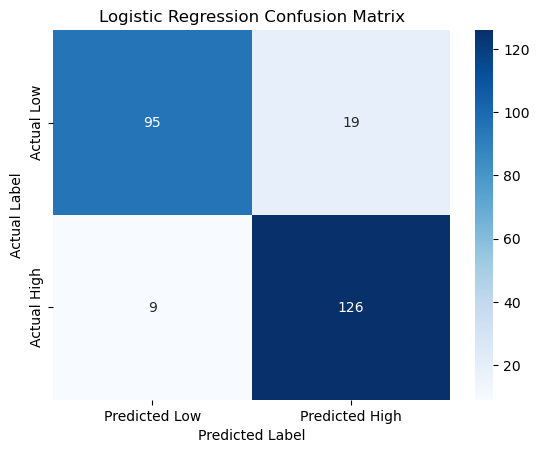

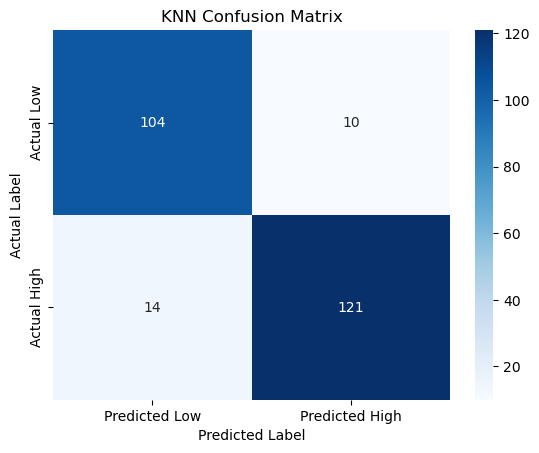

In [128]:
def plot_confusion_matrix(actual, predicted, title):
    true_positive = np.sum((actual == 1) & (predicted == 1))
    true_negative = np.sum((actual == 0) & (predicted == 0))
    false_positive = np.sum((actual == 0) & (predicted == 1))
    false_negative = np.sum((actual == 1) & (predicted == 0))

    confusion = np.array([[true_negative, false_positive],
                          [false_negative, true_positive]])

    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted Low', 'Predicted High'],yticklabels=['Actual Low', 'Actual High'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# Use variable names exactly as in your working code
plot_confusion_matrix(test_labels, predicted_labels, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(test_labels, knn_predictions, "KNN Confusion Matrix")


# CASE 2: After Removing Outliers - I use Percentile Method to remove outliers beacuse distribution are mixed distribution and for that we use PErcentile Method to solve a Problem

In [147]:
# Define columns to check for outliers
cols = ['Ram(GB)', 'Inches', 'Weight[KG]']

# For each column, remove rows outside the 1st and 99th percentiles
for col in cols:
    lower_bound = df_cleaned[col].quantile(0.01)
    upper_bound = df_cleaned[col].quantile(0.99)
    df_cleaned_1 = df_cleaned[(df_cleaned[col] >= lower_bound) & (df[col] <= upper_bound)]

# After removing Outliers We reagain apply ML Models on it ans see which dataset works best

In [149]:
# Encode categorical variables manually
df_cleaned_1 = pd.get_dummies(df_cleaned_1, drop_first=True)
# Let's say df_cleaned is your cleaned DataFrame with 'HighPrice' column indicating expensive laptops (1) or not (0).

# Split data into features and target
features = df_cleaned_1.drop(columns=['HighPrice']).values
labels = df_cleaned_1['HighPrice'].values

# Convert data into numeric arrays for processing
features = np.array(features, dtype=float)
labels = np.array(labels, dtype=float)

# Split data into training (80%) and testing (20%)
split_point = int(0.8 * len(features))
train_features = features[:split_point]
train_labels = labels[:split_point]
test_features = features[split_point:]
test_labels = labels[split_point:]

# Build a simple logistic regression model using Keras
model = Sequential([
    Input(shape=(train_features.shape[1],)),
    Dense(1, activation='sigmoid')  # Output probability of being high priced
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_features, train_labels, epochs=50, batch_size=32, verbose=0)

# Predict probabilities on the test set and convert them to binary labels
predicted_probabilities = model.predict(test_features)
predicted_labels = (predicted_probabilities > 0.5).astype(int).flatten()

# Define a simple KNN function from scratch without sklearn
def knn_predict(train_X, train_Y, test_X, k):
    train_X = np.array(train_X, dtype=float)
    train_Y = np.array(train_Y)
    test_X = np.array(test_X, dtype=float)

    guesses = []
    for each_laptop in test_X:
        distances = np.linalg.norm(train_X - each_laptop, axis=1)
        closest_indices = distances.argsort()[:k]
        closest_labels = train_Y[closest_indices]
        unique_labels, counts = np.unique(closest_labels, return_counts=True)
        guess = unique_labels[np.argmax(counts)]
        guesses.append(guess)
    return np.array(guesses)

# Use KNN to predict on test data
knn_predictions = knn_predict(train_features, train_labels, test_features, k=5)

# Define evaluation metrics calculation function
def evaluate(true_labels, predicted_labels):
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    true_negatives = np.sum((true_labels == 0) & (predicted_labels == 0))
    false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))

    accuracy = (true_positives + true_negatives) / len(true_labels)
    precision = true_positives / (true_positives + false_positives + 1e-10)
    recall = true_positives / (true_positives + false_negatives + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)

    return accuracy, precision, recall, f1

# Evaluate Logistic Regression and KNN models
result_logistic = evaluate(test_labels, predicted_labels)
result_knn = evaluate(test_labels, knn_predictions)

# Create a comparison table for evaluation metrics
table = pd.DataFrame(
    [result_logistic, result_knn],
    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    index=['Logistic Regression', 'KNN']
)

# Display the comparison table
print(table)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.880658   0.886364  0.893130  0.889734
KNN                  0.905350   0.921875  0.900763  0.911197


#  Confusing Matrix Plot after Removing Outliers

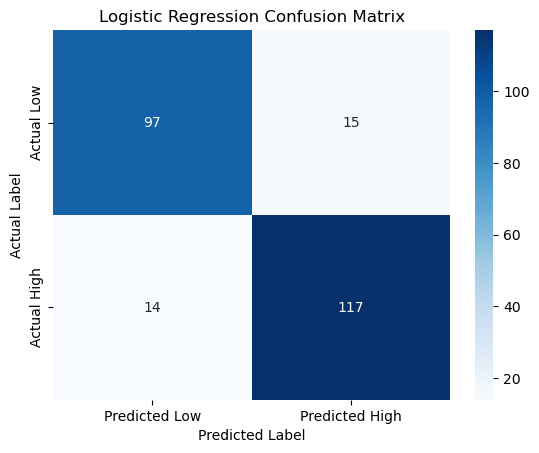

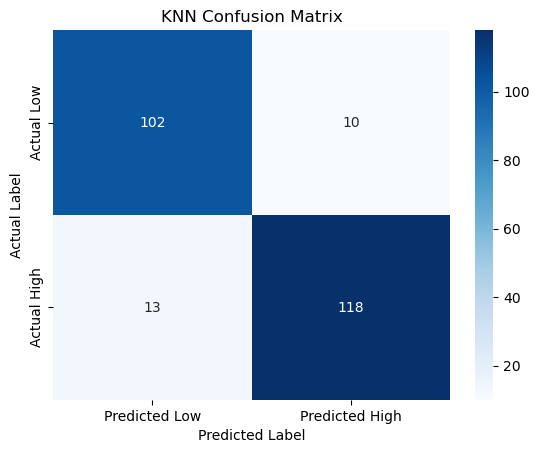

In [151]:
def plot_confusion_matrix_1(actual, predicted, title):
    true_positive = np.sum((actual == 1) & (predicted == 1))
    true_negative = np.sum((actual == 0) & (predicted == 0))
    false_positive = np.sum((actual == 0) & (predicted == 1))
    false_negative = np.sum((actual == 1) & (predicted == 0))

    confusion = np.array([[true_negative, false_positive],
                          [false_negative, true_positive]])

    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted Low', 'Predicted High'],yticklabels=['Actual Low', 'Actual High'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# Use variable names exactly as in your working code
plot_confusion_matrix_1(test_labels, predicted_labels, "Logistic Regression Confusion Matrix")
plot_confusion_matrix_1(test_labels, knn_predictions, "KNN Confusion Matrix")


# Comparing Both Trained Modeels for Outliers and without Outliers
After cleaning my data by removing outliers, I observed an improvement in my models' performance. For the logistic regression model, the accuracy improved from approximately 87% to 88%, and the F1 score also showed a positive increase. For the K-Nearest Neighbors (KNN) model, the accuracy is liile increased from about 90% to 90.5%, along with a improvement in the F1 score. This indicates that after removing extreme values from our dataset,which helps a models to focus on the typical data range, allowing them to learn better and make more accurate predictions. Based on these metrics, My Conclusion is that the models which are trained on the cleaned data give a more accurate and stable prediction of whether a laptop is expensive or not.If I compare both model, KNN showed the best overall performance, making it the preferred choice for the classification task.

# FINAL CONCLUSION

By using machine learning models on the laptop specifications data, I can analyse whether a laptop is likely to be expensive or not. This prediction is based on key features like brand, screen size, CPU, RAM, memory, GPU, operating system, and weight. The models—especially the K-Nearest Neighbors one—show strong performance with accuracy around 90%. By this means I now have a effective tool to classify laptops by price category, which could help businesses to optimize pricing strategies, inventory planning, and marketing efforts, and assist customers in making best purchase decisions based on their preferences and budget.